## **Decision Tree**

In [ ]:
#!pip install pandas

Reading the data

In [ ]:
import pandas as pd

# Reading the csv file
df = pd.read_csv('RansomwareData.csv')

# Display the first few rows of the dataframe


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Pre-process the data

In [ ]:
print(df.isnull().sum())

10001      0
1          0
2          0
0          0
0.1        0
          ..
0.30930    0
0.30931    0
0.30932    0
0.30933    0
0.30934    0
Length: 30970, dtype: int64


In [ ]:
df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for column in ['Source IP Address', 'Destination IP Address', 'Timestamp', 'Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores', 'Payload Data']:
    df[column] = scaler.fit_transform(df[[column]])

In [ ]:
df

In [ ]:
X = df.drop(df.columns[1], axis=1)
X = X.drop(df.columns[2], axis=1)
y = df[df.columns[2]]

from sklearn.decomposition import PCA



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Make Predictions
y_pred_train = model.predict(X_train)

# Evaluate Training Performance
train_accuracy = accuracy_score(y_train, y_pred_train)
train_report = classification_report(y_train, y_pred_train)
train_confusion = confusion_matrix(y_train, y_pred_train)

print("Training Accuracy: ", train_accuracy)
print("Training Classification Report:\n", train_report)
print("Training Confusion Matrix:\n", train_confusion)


Training Accuracy:  1.0
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        83
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        81
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00        68
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00        30

    accuracy                           1.00      1218
   macro avg       1.00      1.00      1.00      1218
weighted avg       1.00      1.00      1.00      1218

Training Confusion Matrix:
 [[754   0   0   0   0   0   0   0   0   0   0   

In [ ]:
# Evaluate Testing Performance
y_pred_test = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_report = classification_report(y_test, y_pred_test)
test_confusion = confusion_matrix(y_test, y_pred_test)

print("Testing Accuracy: ", test_accuracy)
print("Testing Classification Report:\n", test_report)
print("Testing Confusion Matrix:\n", test_confusion)

Testing Accuracy:  0.8557377049180328
Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       0.80      0.62      0.70        13
           2       0.74      0.61      0.67        23
           3       0.38      0.71      0.50         7
           4       0.40      0.29      0.33         7
           5       0.80      0.89      0.84         9
           6       0.45      0.56      0.50        16
           7       0.64      0.54      0.58        13
           8       0.00      0.00      0.00         1
           9       0.80      0.73      0.76        22
          10       0.50      0.50      0.50         2
          11       0.43      0.75      0.55         4

    accuracy                           0.86       305
   macro avg       0.58      0.60      0.58       305
weighted avg       0.87      0.86      0.86       305

Testing Confusion Matrix:
 [[188   0   0   0   0   0   0   0   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:

# Build the CNN model
CNN = Sequential()
CNN.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
CNN.add(MaxPooling1D(pool_size=2))
CNN.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
CNN.add(MaxPooling1D(pool_size=2))
CNN.add(Flatten())
CNN.add(Dense(256, activation='relu'))
CNN.add(Dense(100, activation='relu'))
CNN.add(Dense(12, activation='softmax'))

# Compile the model
CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
CNN.fit(X_train, y_train, epochs=10, batch_size=4, validation_data=(X_test, y_test))

# Evaluate the model
train_acc = CNN.evaluate(X_train, y_train, verbose=0)[1]
test_acc = CNN.evaluate(X_test, y_test, verbose=0)[1]
print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

In [ ]:

# Build the CNN model
CNN = Sequential()
CNN.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
CNN.add(MaxPooling1D(pool_size=2))
CNN.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
CNN.add(MaxPooling1D(pool_size=2))
CNN.add(Flatten())
CNN.add(Dense(256, activation='relu'))
CNN.add(Dense(100, activation='relu'))
CNN.add(Dense(12, activation='softmax'))
optimizer = Adam(learning_rate=0.0025)
# Compile the model
CNN.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = CNN.fit(X_train, y_train, epochs=25, batch_size=4, validation_data=(X_test, y_test))

# Evaluate the model
train_acc = CNN.evaluate(X_train, y_train, verbose=0)[1]
test_acc = CNN.evaluate(X_test, y_test, verbose=0)[1]
print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

Epoch 1/25
305/305 [==============================] - 3288s 11s/step - loss: 2.3652 - accuracy: 0.7053 - val_loss: 0.6949 - val_accuracy: 0.8033
Epoch 2/25
305/305 [==============================] - 3296s 11s/step - loss: 0.5048 - accuracy: 0.8563 - val_loss: 0.6262 - val_accuracy: 0.8164
Epoch 3/25
305/305 [==============================] - 3278s 11s/step - loss: 0.3550 - accuracy: 0.8933 - val_loss: 0.5659 - val_accuracy: 0.8295
Epoch 4/25
305/305 [==============================] - 3273s 11s/step - loss: 0.2879 - accuracy: 0.9138 - val_loss: 0.6628 - val_accuracy: 0.8033
Epoch 5/25
305/305 [==============================] - 3253s 11s/step - loss: 0.5313 - accuracy: 0.9105 - val_loss: 1.0785 - val_accuracy: 0.8164
Epoch 6/25
305/305 [==============================] - 3272s 11s/step - loss: 0.2451 - accuracy: 0.9294 - val_loss: 0.7022 - val_accuracy: 0.8459
Epoch 7/25
305/305 [==============================] - 3257s 11s/step - loss: 0.1599 - accuracy: 0.9524 - val_loss: 0.7295 - val_ac

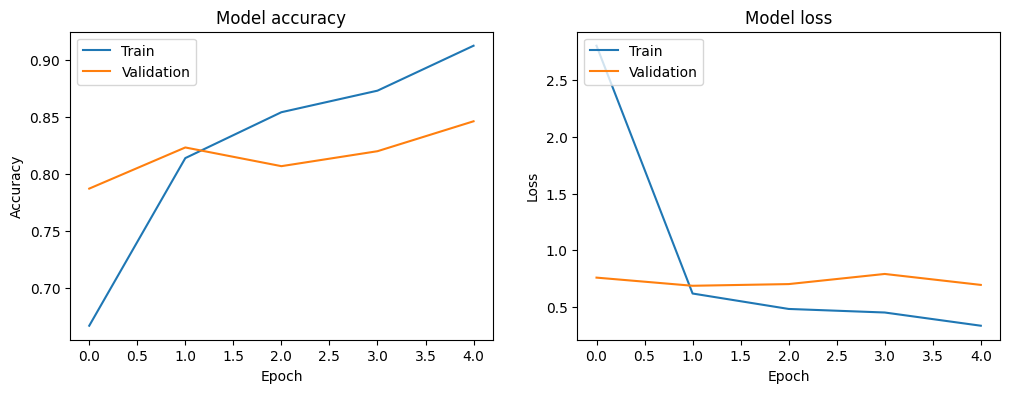

NameError: name 'X_test_cnn' is not defined

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Predict the values from the test set
y_pred = np.argmax(CNN.predict(X_test_cnn), axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# serialize model to JSON
model_json = CNN.to_json()
with open("CNN30Kv100Emodel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN30Kv100Emodel.h5")
print("Saved model to disk")

# later...

# load json and create model
json_file = open('CNN30Kv100Emodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("CNN30Kv100Emodel.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Predict the values from the test set
y_pred = np.argmax(CNN.predict(X_test_cnn), axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1, 12)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot progression of accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Progression')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Progression')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping



# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data for LSTM: LSTMs expect 3D input: (samples, timesteps, features)
# Here, we will treat each sample as a sequence with one timestep
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to numpy arrays for TensorFlow
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Build the LSTM model
model = models.Sequential()
model.add(layers.LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # Binary classification, sigmoid activation

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# To visualize the model's architecture
model.summary()


## **LLM**

In [ ]:
!pip install transformers[torch]
!pip install accelerate

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset, DataLoader

# Step 1: Read the CSV file
df = pd.read_csv('data_file.csv')

# Step 2: Data Inspection
print(df.info())
print(df.describe())

# Step 3: Feature Selection
# Assuming 'FileName' is the text and 'Benign' is the label
df = df[['FileName', 'Benign']]

# Step 4: Label Encoding
label_encoder = LabelEncoder()
df['Benign'] = label_encoder.fit_transform(df['Benign'])

# Step 5: Text Processing - Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Parameters
MAX_LEN = 128
BATCH_SIZE = 16

# Train-Test Split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['FileName'], df['Benign'], test_size=0.2, random_state=42)

# Create Datasets
train_dataset = CustomDataset(train_texts.tolist(), train_labels.tolist(), tokenizer, MAX_LEN)
test_dataset = CustomDataset(test_texts.tolist(), test_labels.tolist(), tokenizer, MAX_LEN)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Step 6: Model Training
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define Training Arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Step 7: Evaluation
results = trainer.evaluate()
print(results)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

<ipython-input-2-4b5288354815>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Benign'] = label_encoder.fit_transform(df['Benign'])
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ber

Step,Training Loss
10,0.693300
